#  "Explorando el corazón: Utilizando datos clínicos y de estilo de vida para predecir enfermedades cardíacas"

#### INTRODUCCIÓN

 Este proyecto se centra en la detección temprana y prevención de enfermedades cardíacas, que son una de las principales causas de muerte en los Estados Unidos. A través del análisis de factores de riesgo clave como presión arterial alta, colesterol elevado, tabaquismo, estado diabético, obesidad y falta de actividad física, se busca desarrollar un modelo de aprendizaje automático capaz de predecir la condición cardíaca de los individuos. Al aplicar técnicas computacionales avanzadas, se pretende identificar patrones y tendencias en los datos clínicos, lo que permitirá una detección temprana y un enfoque preventivo para mejorar la salud cardiovascular. Este proyecto busca brindar una herramienta eficiente para los profesionales de la salud en la toma de decisiones y promover una atención personalizada y preventiva para reducir la carga de las enfermedades cardíacas en la población.

#### CARACTERÍSTICAS DEL PROBLEMA

A continuación, se muestra una breve descripción con el significado de cada variable para una mejor comprensión acerca del problema a tratar.
 
**HeartDisease**: Encuestados que alguna vez informaron haber tenido una enfermedad cardíaca coronaria (CHD) o un infarto de miocardio (IM).

**IMC**: Índice de Masa Corporal (IMC).

**Smoking**: ¿Ha fumado al menos 100 cigarrillos en toda su vida? (La respuesta Sí o No).

**AlcoholDrinking**: Bebedores frecuentes (hombres adultos que toman más de 14 tragos p/semana y mujeres adultas que toman más de 7 tragos p/semana)

**Stroke**: (Alguna vez le dijeron) (usted tuvo) un accidente cerebrovascular?

**PhysicalHealth**: Su salud física, incluye enfermedades y lesiones físicas, ¿cuántos días durante los últimos 30 días su salud física no fue buena?

**MentalHealth**: Pensando en su salud mental, ¿durante cuántos días durante los últimos 30 días su salud mental no fue buena? (0-30 días).

**DiffWalking**: ¿Tiene serias dificultades para caminar o subir escaleras?

**Sex**: ¿Hombre o Mujer?

**AgeCategory**: Categoría de edad de catorce niveles.

**Race**: Valor de raza/etnicidad imputado.

**Diabetic**: (Alguna vez le dijeron) (usted tenía) diabetes?

**PhysicalActivity**: Adultos que informaron haber realizado actividad física o ejercicio durante los últimos 30 días además de su trabajo habitual.

**GenHealth**: ¿Diría usted que, en general, su salud es...?

**SleepTime**: en promedio, ¿cuántas horas duermes en un período de 24 horas?

**Asthma**: (Alguna vez le dijeron) (usted tenía) asma?

**KidneyDisease**: sin incluir cálculos renales, infección de la vejiga o incontinencia, ¿alguna vez le dijeron que tenía una enfermedad renal?

**SkinCancer**: (Alguna vez le dijeron) (usted tenía) cáncer de piel?

#### OBJETIVO PRINCIPAL A TRATAR

El objetivo principal en este caso es predecir la presencia o ausencia de enfermedad cardíaca (HeartDisease). Por lo tanto, la columna "HeartDisease" será tu variable objetivo o target en el problema de machine learning. Será la variable que se tratará de  predecir utilizando las demás características presentes en el dataframe.

#### ANÁLISIS EXPLORATORIO DE DATOS (EDA)




In [1]:
# Importamos las distintas librerias necesarias para el análisis

# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Leemos el archivo de data/preprocessed_heart
df= pd.read_csv("../data/processed/processed_heart.csv")
df.head()


,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory_encoded,Race_encoded,Diabetic_encoded,GenHealth_encoded,BMI_Category_Ordinal,GrupoSalud_Ordinal,GrupoSalud_Mental_Ordinal,SleepGroup_Ordinal
0,0,1,0,0,0,0,1,1,0,1,7,5,2,4,1,1,3,1
1,0,0,0,1,0,0,1,0,0,0,12,5,0,4,2,1,1,3
2,0,1,0,0,0,1,1,1,0,0,9,5,2,1,3,3,3,3
3,0,0,0,0,0,0,0,0,0,1,11,5,0,2,2,1,1,2
4,0,0,0,0,1,0,1,0,0,0,4,5,0,4,2,3,1,3


In [3]:
# Observamos que la cantidad de datos es bastante grande con 319755 filas y 18 columnas
# No nos encontramos con valores nulos
# Todos los valores son numéricos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   HeartDisease               319795 non-null  int64
 1   Smoking                    319795 non-null  int64
 2   AlcoholDrinking            319795 non-null  int64
 3   Stroke                     319795 non-null  int64
 4   DiffWalking                319795 non-null  int64
 5   Sex                        319795 non-null  int64
 6   PhysicalActivity           319795 non-null  int64
 7   Asthma                     319795 non-null  int64
 8   KidneyDisease              319795 non-null  int64
 9   SkinCancer                 319795 non-null  int64
 10  AgeCategory_encoded        319795 non-null  int64
 11  Race_encoded               319795 non-null  int64
 12  Diabetic_encoded           319795 non-null  int64
 13  GenHealth_encoded          319795 non-null  int64
 14  BMI_

In [4]:
# Nos asecuramos de que no hay valores nulos en ninguna columna
df.isnull().sum()

HeartDisease                 0
Smoking                      0
AlcoholDrinking              0
Stroke                       0
DiffWalking                  0
Sex                          0
PhysicalActivity             0
Asthma                       0
KidneyDisease                0
SkinCancer                   0
AgeCategory_encoded          0
Race_encoded                 0
Diabetic_encoded             0
GenHealth_encoded            0
BMI_Category_Ordinal         0
GrupoSalud_Ordinal           0
GrupoSalud_Mental_Ordinal    0
SleepGroup_Ordinal           0
dtype: int64

In [5]:
# Incluimos todos los parámetros para hacernos una idea más general
df.describe(include="all")

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory_encoded,Race_encoded,Diabetic_encoded,GenHealth_encoded,BMI_Category_Ordinal,GrupoSalud_Ordinal,GrupoSalud_Mental_Ordinal,SleepGroup_Ordinal
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,0.412477,0.068097,0.037740,0.138870,0.475273,0.775362,0.134061,0.036833,0.093244,6.514536,4.396742,0.300386,2.220904,3.239397,1.252524,1.311559,2.602086
std,0.279766,0.492281,0.251912,0.190567,0.345812,0.499389,0.417344,0.340718,0.188352,0.290775,3.564759,1.212208,0.716480,1.534647,1.156954,0.592778,0.618505,0.654872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9.000000,5.000000,0.000000,4.000000,4.000000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,3.000000,4.000000,6.000000,3.000000,3.000000,3.000000


In [6]:
# Para ver el contenido de valores únicos de cada variable
for column in df.columns :
    unique_values = df[column].unique()
    print(column, unique_values)

HeartDisease [0 1]
Smoking [1 0]
AlcoholDrinking [0 1]
Stroke [0 1]
DiffWalking [0 1]
Sex [0 1]
PhysicalActivity [1 0]
Asthma [1 0]
KidneyDisease [0 1]
SkinCancer [1 0]
AgeCategory_encoded [ 7 12  9 11  4 10  8  6  5  0  3  2  1]
Race_encoded [5 2 1 0 4 3]
Diabetic_encoded [2 0 1 3]
GenHealth_encoded [4 1 2 3 0]
BMI_Category_Ordinal [1 2 3 4 6 5]
GrupoSalud_Ordinal [1 3 2]
GrupoSalud_Mental_Ordinal [3 1 2]
SleepGroup_Ordinal [1 3 2]


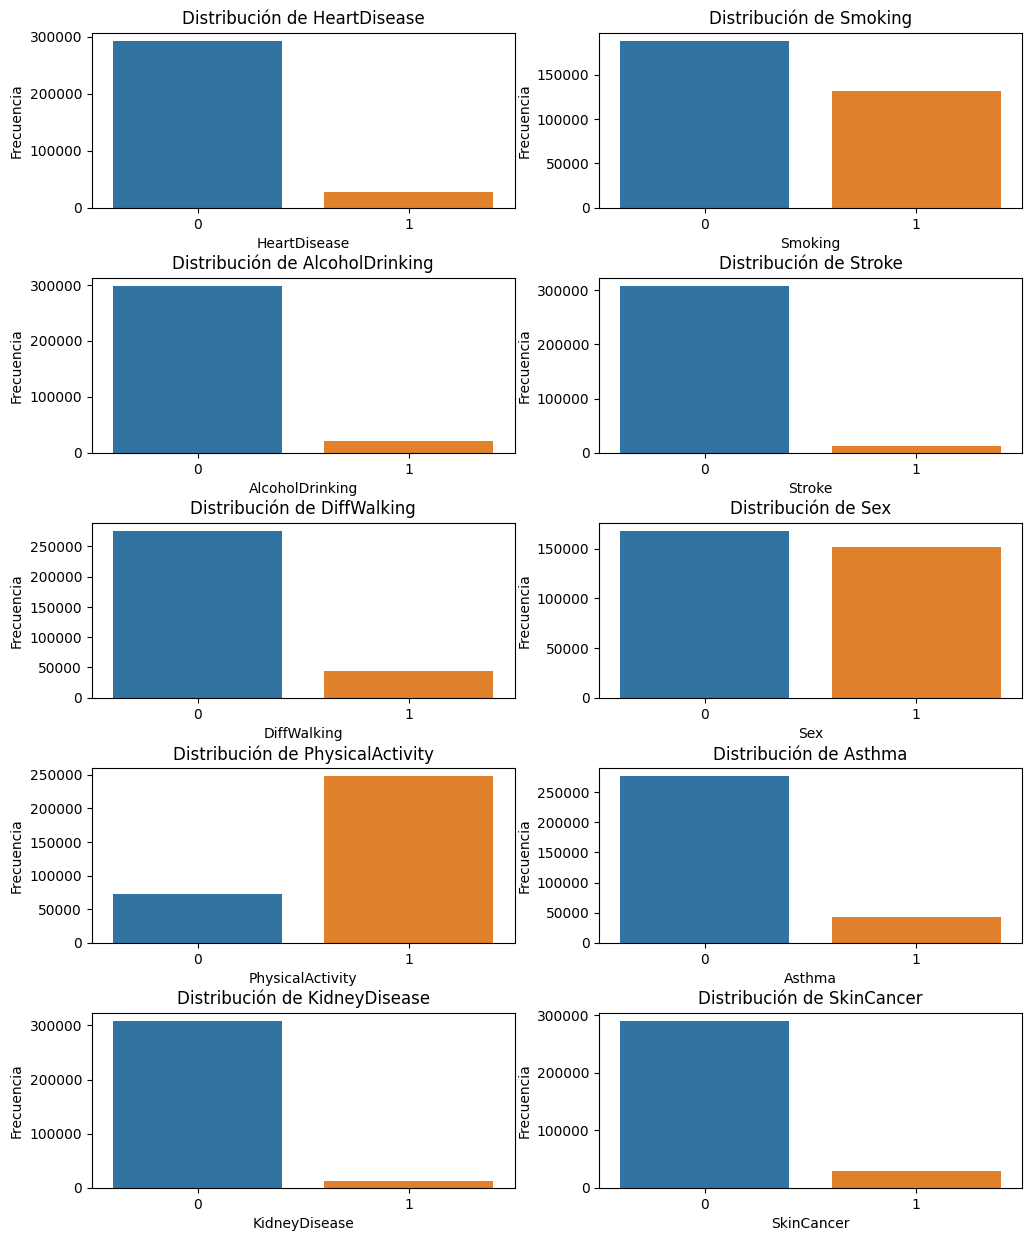

In [7]:
# Lista de variables binarias
binary_columns = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
                  "Sex", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

# Configuración de los subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
fig.subplots_adjust(hspace=0.4) # la distancia entre ambas barras

# Gráfico de barras para la primera variable binaria
sns.countplot(x=binary_columns[0], data=df, ax=axes[0, 0])
axes[0, 0].set_title(f'Distribución de {binary_columns[0]}')
axes[0, 0].set_xlabel(binary_columns[0])
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de barras para la segunda variable binaria
sns.countplot(x=binary_columns[1], data=df, ax=axes[0, 1])
axes[0, 1].set_title(f'Distribución de {binary_columns[1]}')
axes[0, 1].set_xlabel(binary_columns[1])
axes[0, 1].set_ylabel('Frecuencia')

# Repetición para las siguientes variables binarias
sns.countplot(x=binary_columns[2], data=df, ax=axes[1, 0])
axes[1, 0].set_title(f'Distribución de {binary_columns[2]}')
axes[1, 0].set_xlabel(binary_columns[2])
axes[1, 0].set_ylabel('Frecuencia')

sns.countplot(x=binary_columns[3], data=df, ax=axes[1, 1])
axes[1, 1].set_title(f'Distribución de {binary_columns[3]}')
axes[1, 1].set_xlabel(binary_columns[3])
axes[1, 1].set_ylabel('Frecuencia')

sns.countplot(x=binary_columns[4], data=df, ax=axes[2, 0])
axes[2, 0].set_title(f'Distribución de {binary_columns[4]}')
axes[2, 0].set_xlabel(binary_columns[4])
axes[2, 0].set_ylabel('Frecuencia')

sns.countplot(x=binary_columns[5], data=df, ax=axes[2, 1])
axes[2, 1].set_title(f'Distribución de {binary_columns[5]}')
axes[2, 1].set_xlabel(binary_columns[5])
axes[2, 1].set_ylabel('Frecuencia')

sns.countplot(x=binary_columns[6], data=df, ax=axes[3, 0])
axes[3, 0].set_title(f'Distribución de {binary_columns[6]}')
axes[3, 0].set_xlabel(binary_columns[6])
axes[3, 0].set_ylabel('Frecuencia')

sns.countplot(x=binary_columns[7], data=df, ax=axes[3, 1])
axes[3, 1].set_title(f'Distribución de {binary_columns[7]}')
axes[3, 1].set_xlabel(binary_columns[7])
axes[3, 1].set_ylabel('Frecuencia')

sns.countplot(x=binary_columns[8], data=df, ax=axes[4, 0])
axes[4, 0].set_title(f'Distribución de {binary_columns[8]}')
axes[4, 0].set_xlabel(binary_columns[8])
axes[4, 0].set_ylabel('Frecuencia')

sns.countplot(x=binary_columns[9], data=df, ax=axes[4, 1])
axes[4, 1].set_title(f'Distribución de {binary_columns[9]}')
axes[4, 1].set_xlabel(binary_columns[9])
axes[4, 1].set_ylabel('Frecuencia');

Al realizar el análisis y la visualización de los gráficos de barras, se observa que muchas de las variables en el conjunto de datos presentan desequilibrios significativos. Este desequilibrio implica que hay una gran disparidad en la distribución de las clases o categorías dentro de esas variables. Abordar este desequilibrio será un desafío importante para mejorar nuestro modelo de aprendizaje automático.

In [8]:
import os
os.chdir('..')

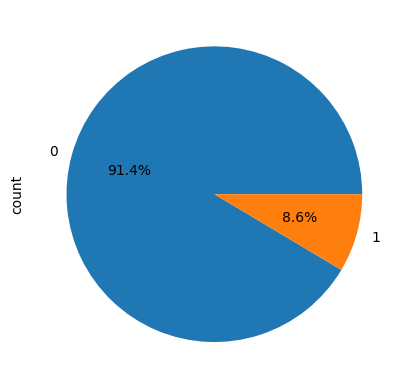

In [9]:
# Aquí podemos apreciar mejor el desbalanceo de la variable target "HeartDisease"
df['HeartDisease'].value_counts().plot.pie(autopct="%.1f%%");

In [10]:
# Creamos la carpeta de trabajo si no existe
os.makedirs('docs/images', exist_ok=True)


In [11]:
# Guardamos el pie plot de "HeartDisease"
plt.savefig('docs/images/pie_plot_HeartDisease.png')


<Figure size 640x480 with 0 Axes>

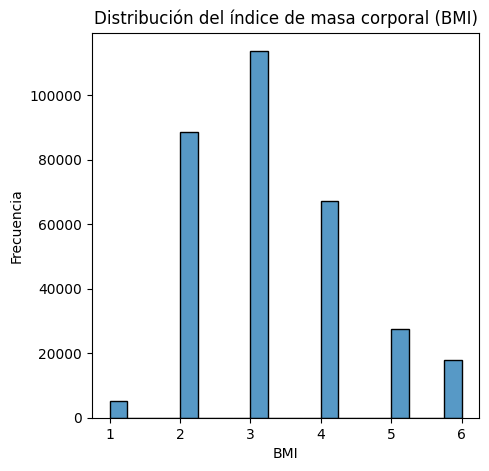

In [51]:
# Visualización de datos
# histograma del índice de masa corporal (BMI) en la variable de "BMI_Category_Ordinal"
plt.figure(figsize=(5, 5))
sns.histplot(df['BMI_Category_Ordinal'], bins=20)
plt.title('Distribución del índice de masa corporal (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

Al analizar el gráfico de barras, se puede observar claramente que existe una distribución desigual en las categorías de peso. La mayoría de las personas en el conjunto de datos se encuentran en la categoría de "sobrepeso" (número 3), seguida por la categoría de "peso normal" (número 2) y la categoría de "obesidad clase I" (número 4). Estos hallazgos revelan un alto porcentaje de personas que no se encuentran dentro de un rango de peso considerado saludable.

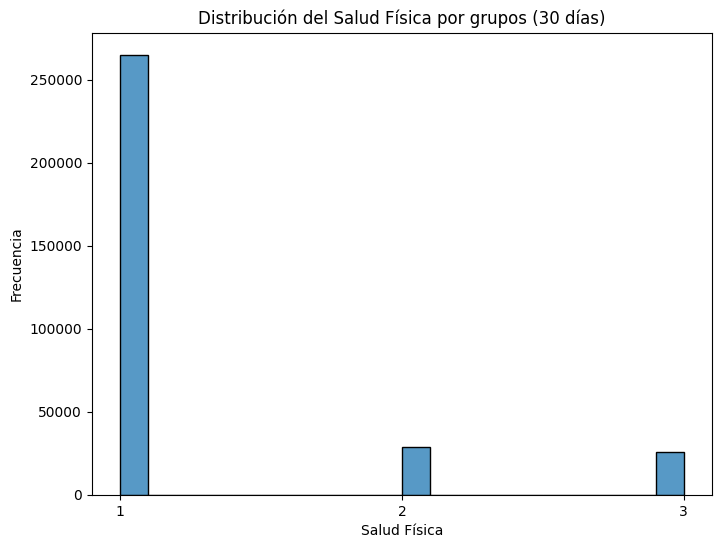

In [52]:
# Visualización de datos de la variable "GrupoSalud_Ordinal" 
plt.figure(figsize=(8, 6))
sns.histplot(df['GrupoSalud_Ordinal'], bins=20)
plt.title('Distribución del Salud Física por grupos (30 días)')
plt.xlabel('Salud Física')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 4))
plt.show()


La distribución de la salud física por grupos (30 días) revela que la mayoría de las personas se encuentran en el grupo de "Buena salud" (número 1). Por otro lado, se observa una disminución significativa en el número de personas que pertenecen a los grupos de "Salud moderada" y "Mala salud". Estos dos últimos grupos presentan valores muy similares entre sí. Esta distribución desbalanceada plantea un desafío a la hora de abordar estas variables y mejorar nuestro modelo. Es importante considerar estrategias para equilibrar los datos y garantizar una representación más precisa de todas las categorías de salud física en nuestro análisis.

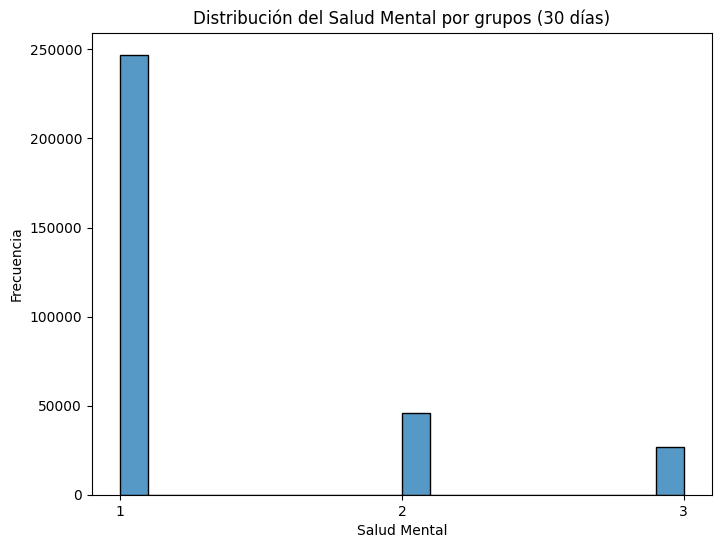

In [53]:
# Visualización de datos de la variable "GrupoSalud_Mental_Ordinal"
plt.figure(figsize=(8, 6))
sns.histplot(df['GrupoSalud_Mental_Ordinal'], bins= 20)
plt.title('Distribución del Salud Mental por grupos (30 días)')
plt.xlabel('Salud Mental')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 4))
plt.show()

La distribución de la salud psíquica por grupos (30 días) revela que la mayoría de las personas se encuentran en el grupo de "Buena salud" (número 1). En segundo lugar, se observa un número considerablemente menor de personas en el grupo de "Salud moderada" (número 2), aunque con una diferencia significativa respecto al grupo de "Buena salud". Por último, el grupo de "Mala salud" (número 3) presenta valores aún más bajos en comparación con los grupos anteriores, aunque la diferencia no es tan marcada como en el caso del grupo de "Salud moderada". Esta distribución desequilibrada destaca la necesidad de abordar adecuadamente el desbalance en los datos para mejorar la representación de todos los grupos de salud psíquica en nuestro análisis.

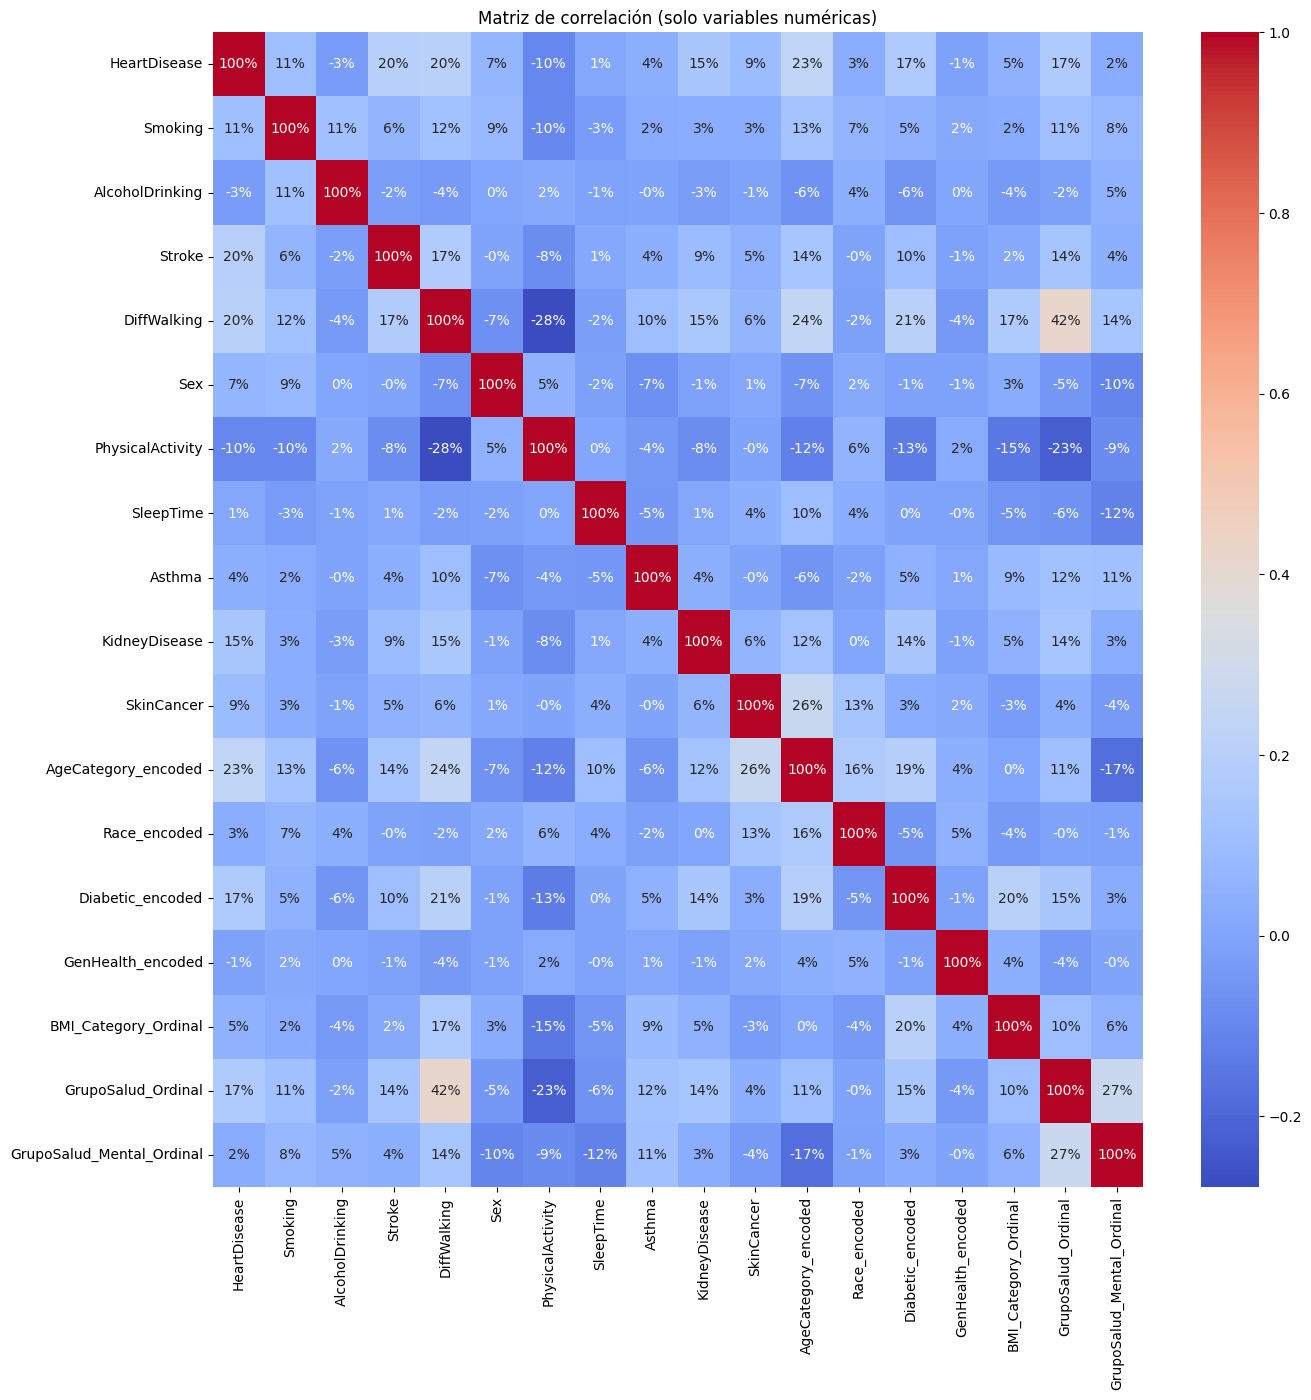

In [54]:
# Seleccionamos las columnas numéricas unicamente dejando fuera las de tipo object
numeric_columns = df.select_dtypes(include=['int32', 'float64', 'int64']).columns

# Calculamos la matriz de correlación para las columnas numéricas
correlation_matrix = df[numeric_columns].corr()

# Creamos mapa de calor de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".0%" )
plt.title('Matriz de correlación (solo variables numéricas)')
plt.show()

In [59]:
# Para observar mejor la correlación que se produce con respecto a la varible target de "HeartDisease"
# Se muestra en porcentage % y por orden ascendente
corr_matrix = df.corr()
corr_matrix['HeartDisease'].sort_values(ascending=False) *100

HeartDisease                 100.000000
AgeCategory_encoded           23.343224
DiffWalking                   20.125805
Stroke                        19.683530
Diabetic_encoded              16.855285
GrupoSalud_Ordinal            16.731876
KidneyDisease                 14.519710
Smoking                       10.776416
SkinCancer                     9.331688
Sex                            7.004048
BMI_Category_Ordinal           5.342468
Asthma                         4.144415
Race_encoded                   3.485362
GrupoSalud_Mental_Ordinal      2.130066
SleepTime                      0.832665
GenHealth_encoded             -1.106186
AlcoholDrinking               -3.207974
PhysicalActivity             -10.002993
Name: HeartDisease, dtype: float64

In [56]:
# Usamos skew para calcular la asimetría de nuestro DataFrame
    # Un valor positivo indica una cola más larga hacia la derecha, lo que significa que hay valores extremos más altos. 
    # Un valor negativo indica una cola más larga hacia la izquierda, lo que significa que hay valores extremos más bajos.
df.skew(axis=0).sort_values(ascending =False)

KidneyDisease                4.918135
Stroke                       4.851460
AlcoholDrinking              3.429019
HeartDisease                 2.962525
SkinCancer                   2.797757
GrupoSalud_Ordinal           2.199359
Asthma                       2.148059
Diabetic_encoded             2.088800
DiffWalking                  2.088606
GrupoSalud_Mental_Ordinal    1.808620
SleepTime                    0.679035
BMI_Category_Ordinal         0.659454
Smoking                      0.355585
Sex                          0.099029
GenHealth_encoded           -0.129635
AgeCategory_encoded         -0.263611
PhysicalActivity            -1.319602
Race_encoded                -1.923663
dtype: float64

In [ ]:
# FALTAN MÁS GRRÁFICOS COMPARANDO CON RESPECTO A NUESTRO TARGET